In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/SpotifyFeatures_cleaned.csv')
embeddings_norm = np.load('../data/song_embeddings.npy')
# If you normalized before saving, this is fine. If not, normalize again:
# embeddings_norm = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)


In [4]:
!pip install umap-learn matplotlib scikit-learn



[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.cluster import KMeans

n_clusters = 8  # Try 6–12, adjust as you like
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_norm)
df['cluster'] = cluster_labels

print("Top genres in each cluster:")
for c in range(n_clusters):
    genres = df[df['cluster'] == c]['genre'].value_counts().head(3).to_dict()
    print(f"Cluster {c}: {genres}")


Top genres in each cluster:
Cluster 0: {'Hip-Hop': 9067, 'Rap': 8960, 'Dance': 7466}
Cluster 1: {'Opera': 8266, 'Classical': 8154, 'Movie': 1333}
Cluster 2: {'Children’s Music': 9324, "Children's Music": 5370, 'Indie': 135}
Cluster 3: {'Indie': 8400, 'Ska': 8164, 'Alternative': 7977}
Cluster 4: {'Jazz': 8916, 'Blues': 8667, 'Country': 8311}
Cluster 5: {'Comedy': 9566, 'Soundtrack': 7368, 'Movie': 6371}
Cluster 6: {'Anime': 8936, 'World': 274, 'Soundtrack': 230}
Cluster 7: {'Reggaeton': 8927, 'Reggae': 8770, 'Ska': 374}


In [ ]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(random_state=42)
embedding_2d = reducer.fit_transform(embeddings_norm)

plt.figure(figsize=(12, 7))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], 
                      c=cluster_labels, cmap='tab10', alpha=0.5, s=3)
plt.colorbar(scatter, label='Cluster')
plt.title("UMAP visualization of SBERT song embeddings (colored by cluster)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


C:\Users\kasip\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\kasip\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


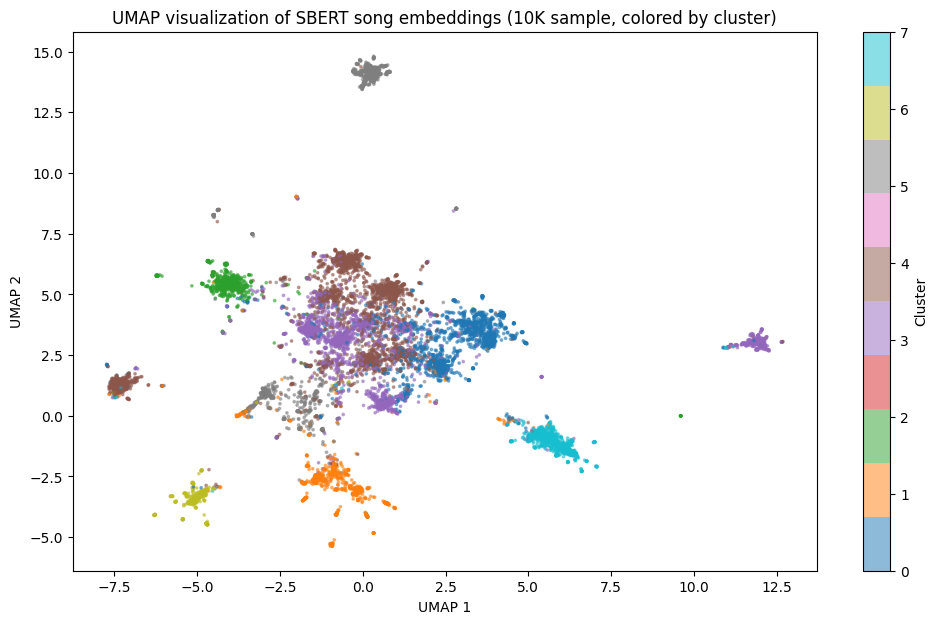

In [6]:
import numpy as np
import umap
import matplotlib.pyplot as plt
# Subsample for faster UMAP (e.g., 10,000 points)
sample_size = 10000
idx = np.random.choice(len(df), sample_size, replace=False)
embeddings_sample = embeddings_norm[idx]
cluster_labels_sample = df.iloc[idx]['cluster'].values

reducer = umap.UMAP(random_state=42)
embedding_2d = reducer.fit_transform(embeddings_sample)

plt.figure(figsize=(12, 7))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], 
                      c=cluster_labels_sample, cmap='tab10', alpha=0.5, s=3)
plt.colorbar(scatter, label='Cluster')
plt.title("UMAP visualization of SBERT song embeddings (10K sample, colored by cluster)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


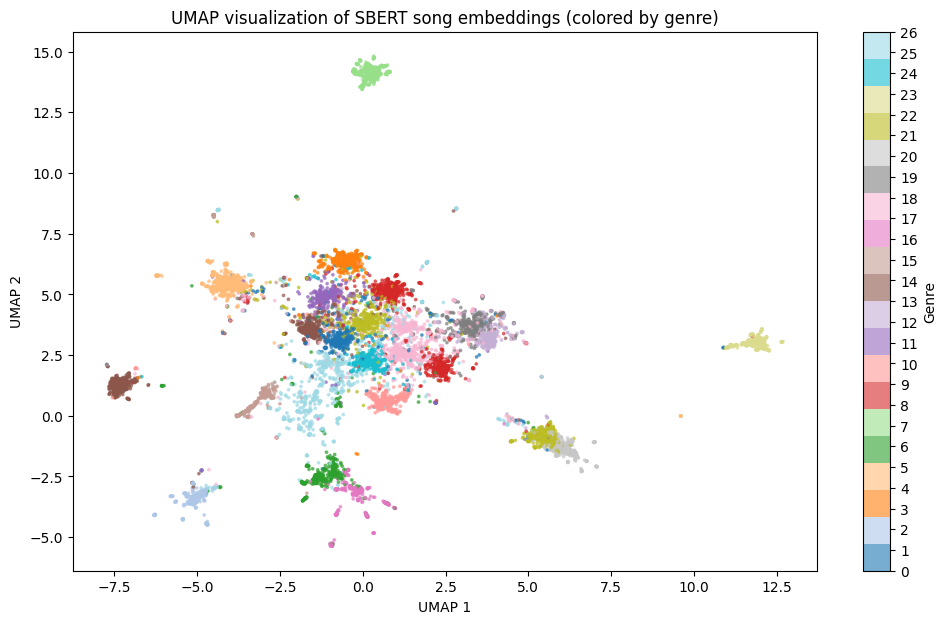

In [7]:
# Map each genre to a unique code (integer)
genres = df['genre'].astype('category')
genre_codes = genres.cat.codes
genre_names = genres.cat.categories

# For your 10K sample:
genre_codes_sample = genre_codes[idx]
genre_names_sample = genres[idx].values

plt.figure(figsize=(12, 7))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], 
                      c=genre_codes_sample, cmap='tab20', alpha=0.6, s=3)
plt.colorbar(scatter, ticks=range(len(genre_names)), label='Genre')
plt.title("UMAP visualization of SBERT song embeddings (colored by genre)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()



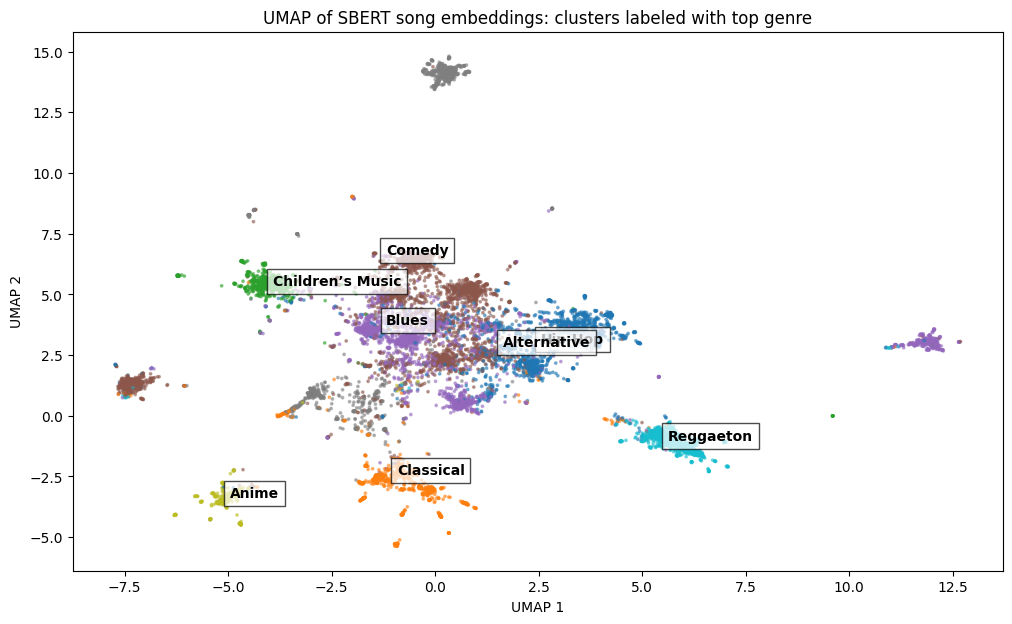

In [8]:
import numpy as np

plt.figure(figsize=(12, 7))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], 
                      c=cluster_labels_sample, cmap='tab10', alpha=0.5, s=3)

# For each cluster, find its “center” and label it with the top genre
for c in np.unique(cluster_labels_sample):
    mask = cluster_labels_sample == c
    if np.sum(mask) == 0:
        continue
    # Get top genre in this cluster
    top_genre = pd.Series(genre_names_sample[mask]).value_counts().index[0]
    # Find the mean position for the cluster
    x, y = embedding_2d[mask, 0].mean(), embedding_2d[mask, 1].mean()
    plt.text(x, y, top_genre, fontsize=10, weight='bold', bbox=dict(facecolor='white', alpha=0.7))

plt.title("UMAP of SBERT song embeddings: clusters labeled with top genre")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


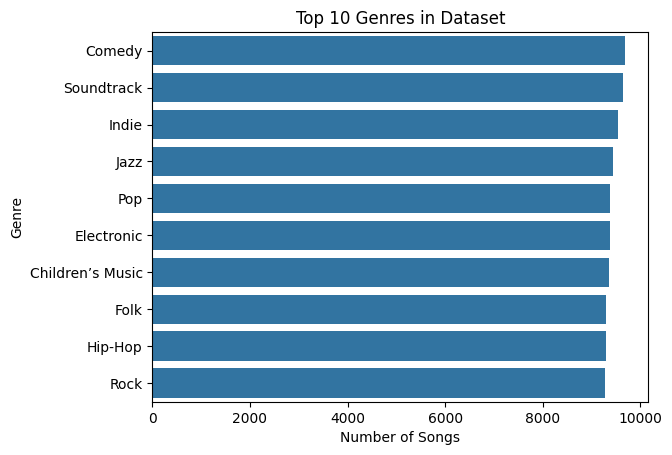

In [9]:
import seaborn as sns

# Top genres
top_genres = df['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres in Dataset")
plt.xlabel("Number of Songs")
plt.ylabel("Genre")
plt.show()


C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\4087082889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_in_cluster.values, y=top_genres_in_cluster.index, palette='muted')


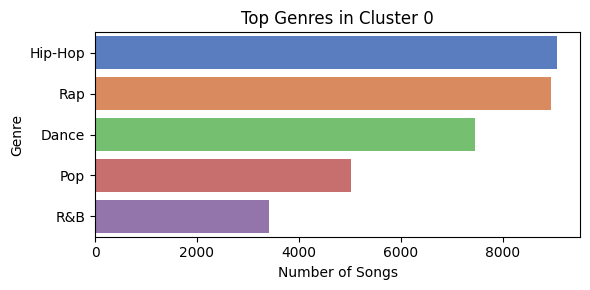

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\4087082889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_in_cluster.values, y=top_genres_in_cluster.index, palette='muted')


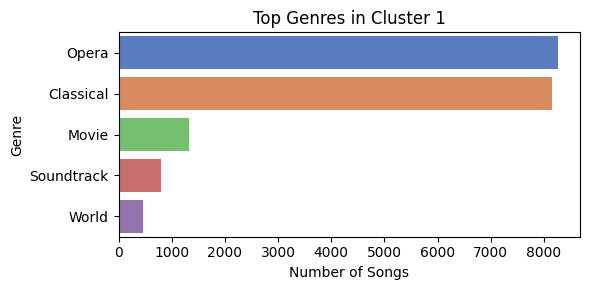

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\4087082889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_in_cluster.values, y=top_genres_in_cluster.index, palette='muted')


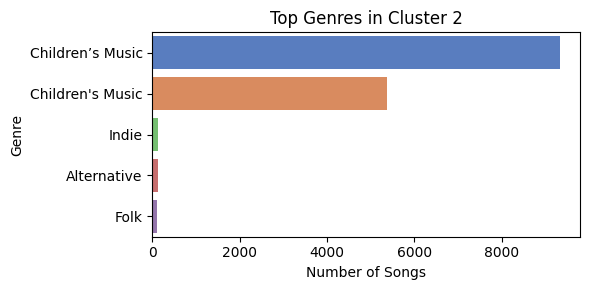

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\4087082889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_in_cluster.values, y=top_genres_in_cluster.index, palette='muted')


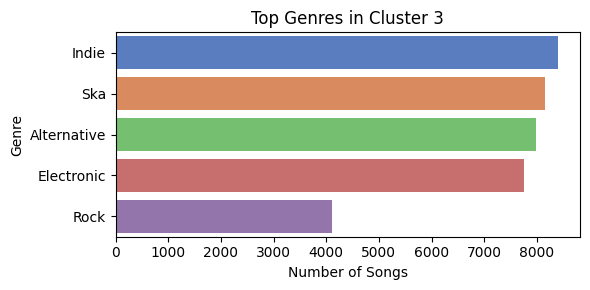

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\4087082889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_in_cluster.values, y=top_genres_in_cluster.index, palette='muted')


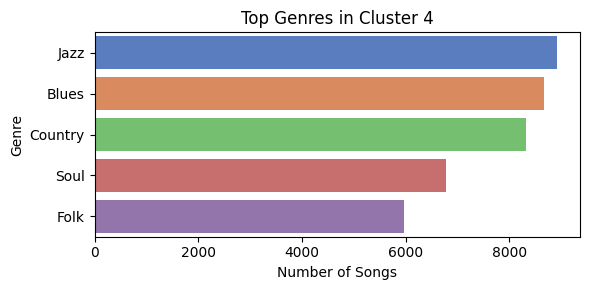

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\4087082889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_in_cluster.values, y=top_genres_in_cluster.index, palette='muted')


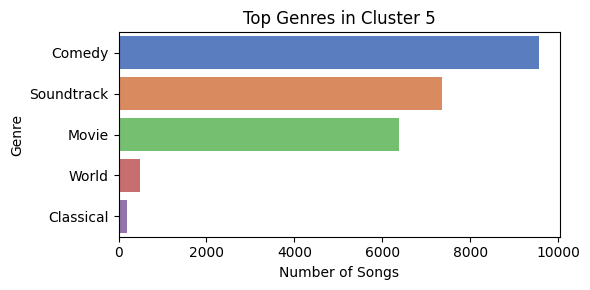

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\4087082889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_in_cluster.values, y=top_genres_in_cluster.index, palette='muted')


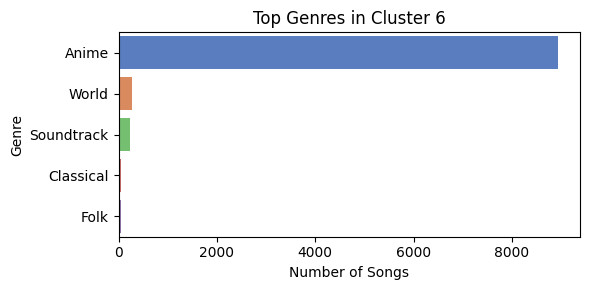

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\4087082889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_in_cluster.values, y=top_genres_in_cluster.index, palette='muted')


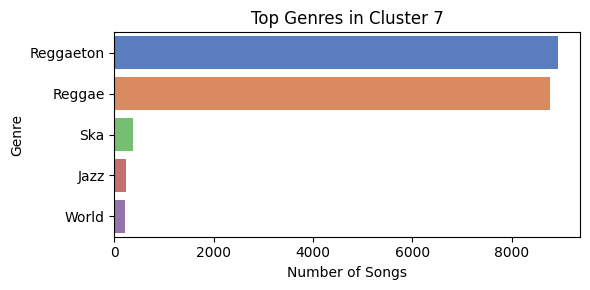

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

n_clusters = df['cluster'].nunique()  # Automatically detect the number of clusters

for cluster_id in range(n_clusters):
    top_genres_in_cluster = df[df['cluster'] == cluster_id]['genre'].value_counts().head(5)
    plt.figure(figsize=(6, 3))
    sns.barplot(x=top_genres_in_cluster.values, y=top_genres_in_cluster.index, palette='muted')
    plt.title(f"Top Genres in Cluster {cluster_id}")
    plt.xlabel("Number of Songs")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()


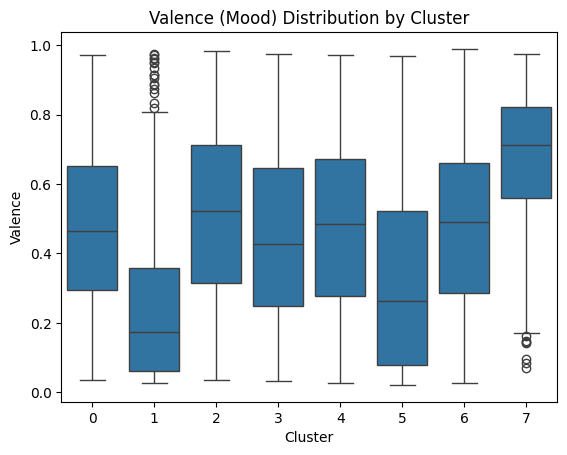

In [11]:
# Distribution by cluster
sns.boxplot(x='cluster', y='valence', data=df.sample(5000))
plt.title("Valence (Mood) Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Valence")
plt.show()


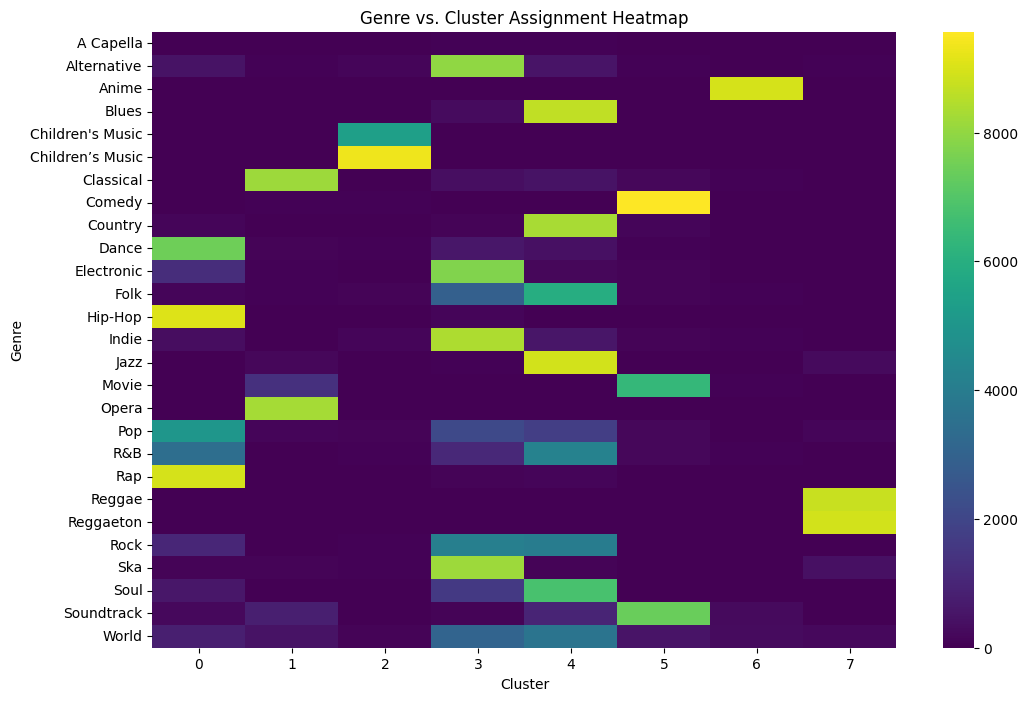

In [12]:
import pandas as pd
import seaborn as sns

pivot = pd.crosstab(df['genre'], df['cluster'])
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='viridis')
plt.title("Genre vs. Cluster Assignment Heatmap")
plt.ylabel("Genre")
plt.xlabel("Cluster")
plt.show()


In [13]:
for c in range(n_clusters):
    print(f"\nCluster {c} example songs:")
    print(df[df['cluster']==c][['track_name', 'artist_name', 'genre']].head(5))



Cluster 0 example songs:
                                     track_name   artist_name genre
136                                   Desperado       Rihanna   R&B
137  Ice On My Baby (feat. Kevin Gates) - Remix     Yung Bleu   R&B
141               Make It Out Alive (feat. SiR)           Nao   R&B
144                        You Make Me Wanna...         Usher   R&B
145                                        Hero  Mariah Carey   R&B

Cluster 1 example songs:
                                          track_name          artist_name  \
0                        C'est beau de faire un Show       Henri Salvador   
1                   Perdu d'avance (par Gad Elmaleh)    Martin & les fées   
5                     Le petit souper aux chandelles       Henri Salvador   
6  Premières recherches (par Paul Ventimila, Lori...    Martin & les fées   
9                          Les bisous des bisounours  Le Club des Juniors   

   genre  
0  Movie  
1  Movie  
5  Movie  
6  Movie  
9  Movie  

Cluster 2 

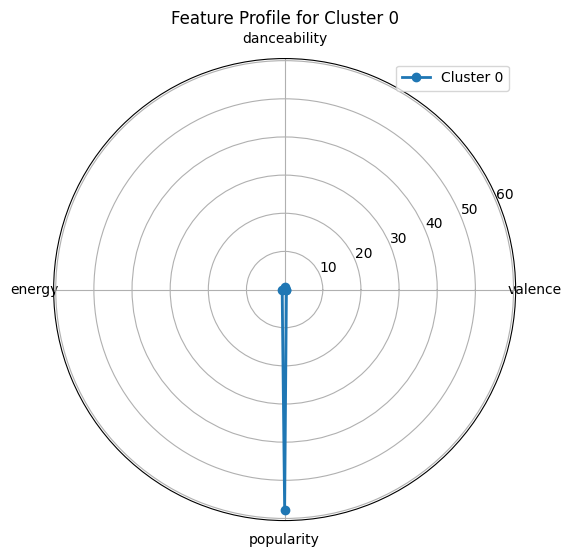

In [14]:
import numpy as np

cluster_id = 0
features = ['valence', 'danceability', 'energy', 'popularity']
means = df[df['cluster'] == cluster_id][features].mean().values

angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
means = np.concatenate((means, [means[0]]))
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, means, 'o-', linewidth=2, label=f'Cluster {cluster_id}')
ax.fill(angles, means, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), features)
plt.title(f"Feature Profile for Cluster {cluster_id}")
plt.legend()
plt.show()


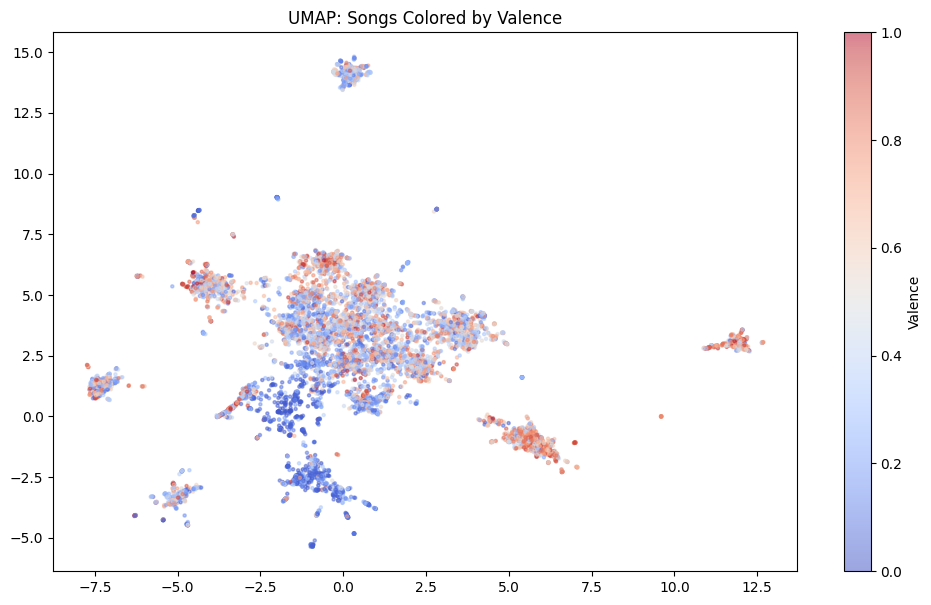

In [15]:
plt.figure(figsize=(12,7))
plt.scatter(embedding_2d[:,0], embedding_2d[:,1], c=df.iloc[idx]['valence'], cmap='coolwarm', alpha=0.5, s=5)
plt.colorbar(label="Valence")
plt.title("UMAP: Songs Colored by Valence")
plt.show()


C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\3050249138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_in_cluster.values, y=top_artists_in_cluster.index, palette='crest')


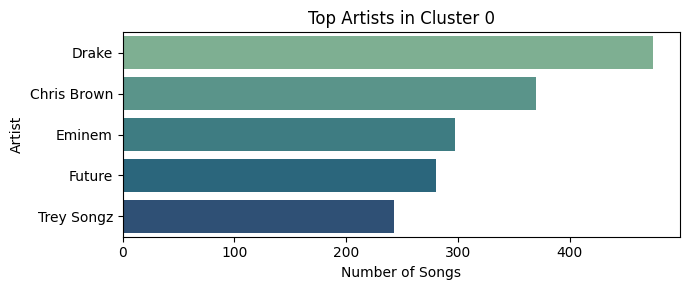

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\3050249138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_in_cluster.values, y=top_artists_in_cluster.index, palette='crest')


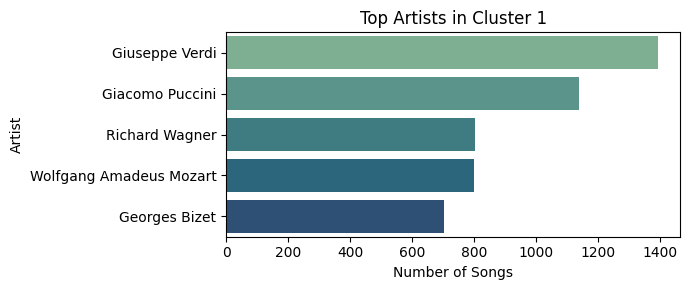

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\3050249138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_in_cluster.values, y=top_artists_in_cluster.index, palette='crest')


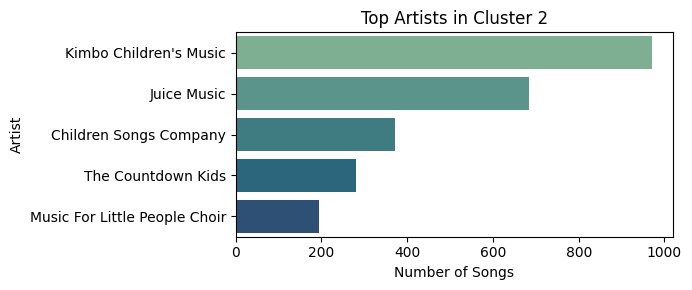

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\3050249138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_in_cluster.values, y=top_artists_in_cluster.index, palette='crest')


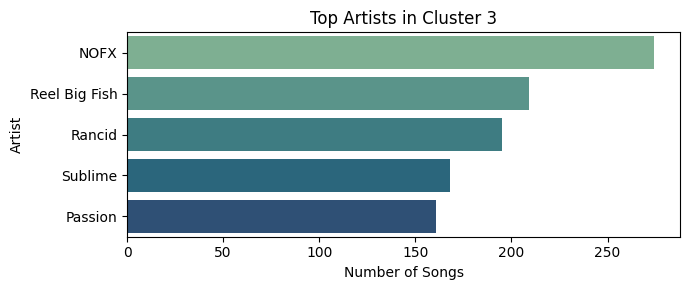

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\3050249138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_in_cluster.values, y=top_artists_in_cluster.index, palette='crest')


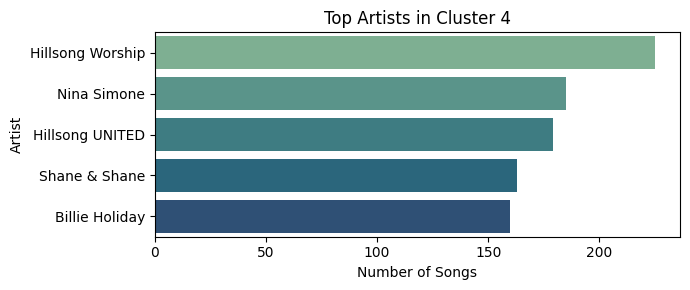

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\3050249138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_in_cluster.values, y=top_artists_in_cluster.index, palette='crest')


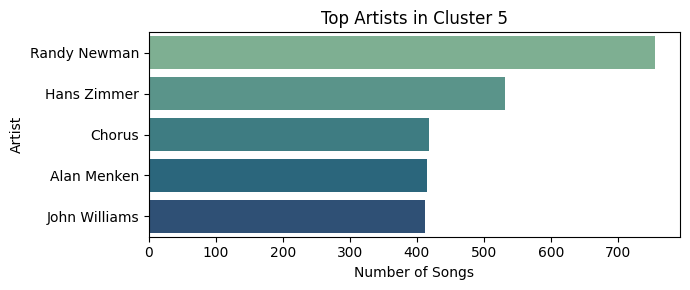

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\3050249138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_in_cluster.values, y=top_artists_in_cluster.index, palette='crest')


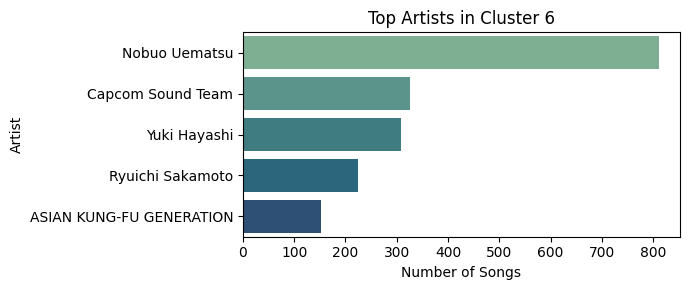

C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\3050249138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_in_cluster.values, y=top_artists_in_cluster.index, palette='crest')


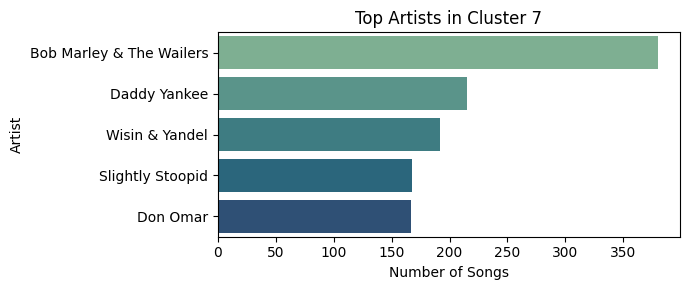

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

n_clusters = df['cluster'].nunique()

for cluster_id in range(n_clusters):
    top_artists_in_cluster = df[df['cluster'] == cluster_id]['artist_name'].value_counts().head(5)
    plt.figure(figsize=(7, 3))
    sns.barplot(x=top_artists_in_cluster.values, y=top_artists_in_cluster.index, palette='crest')
    plt.title(f"Top Artists in Cluster {cluster_id}")
    plt.xlabel("Number of Songs")
    plt.ylabel("Artist")
    plt.tight_layout()
    plt.show()


C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\177953544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='valence', data=df.sample(5000), palette='pastel')


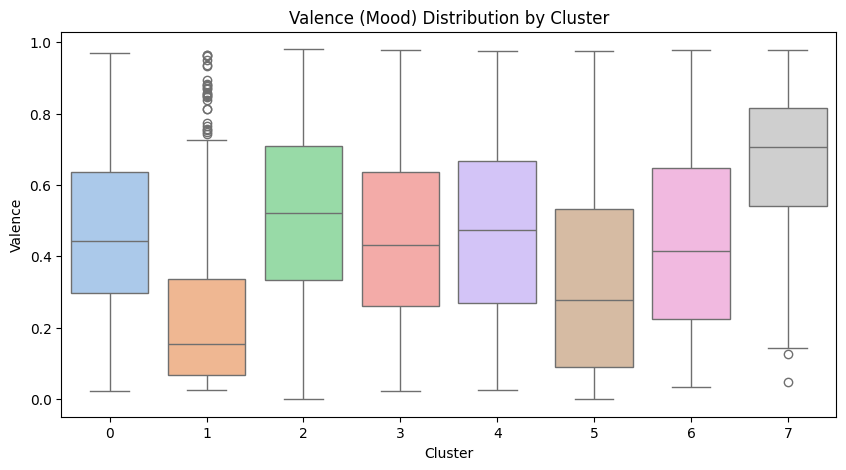

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='valence', data=df.sample(5000), palette='pastel')
plt.title("Valence (Mood) Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Valence")
plt.show()


C:\Users\kasip\AppData\Local\Temp\ipykernel_17064\1246047422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='danceability', data=df.sample(5000), palette='pastel')


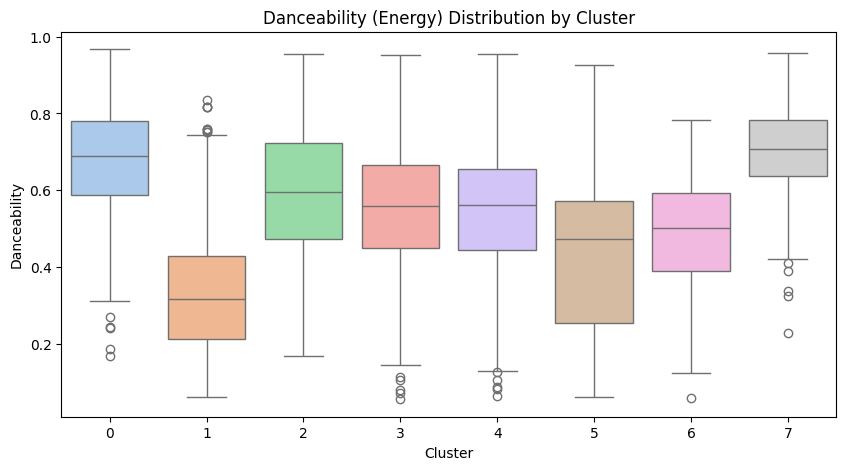

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='danceability', data=df.sample(5000), palette='pastel')
plt.title("Danceability (Energy) Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Danceability")
plt.show()


KeyError: 'happiness'

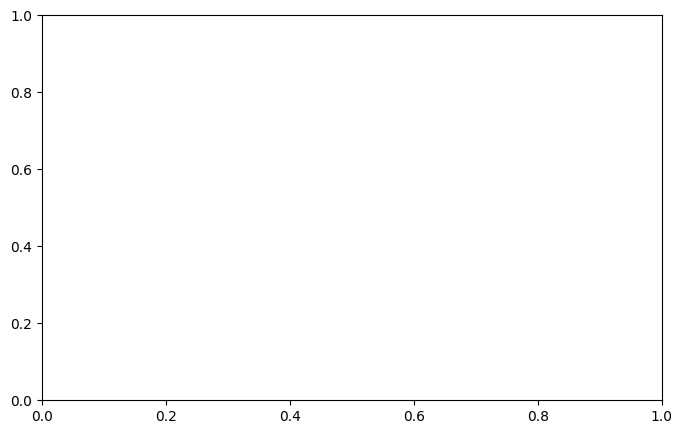

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
scatter = ax.scatter(
    embedding_2d[:, 0],
    embedding_2d[:, 1],
    c=df.iloc[idx]['happiness'],  # or 'dance_factor'
    cmap='plasma',
    alpha=0.7,
    s=7
)
plt.colorbar(scatter, ax=ax, label="Happiness")
ax.set_title("Song Mood Map (Happiness)")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
st.subheader("🌈 Song Mood Map")
st.pyplot(fig)
